### Importing Needed packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data

In [5]:
df = pd.read_csv('Fish.csv')

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
cdf = df[['Width','Weight']]
cdf.head(9)

,Width,Weight
0,4.0200,242.0
1,4.3056,290.0
2,4.6961,340.0
3,4.4555,363.0
4,5.1340,430.0
5,4.9274,450.0
6,5.2785,500.0
7,4.6900,390.0
8,4.8438,450.0


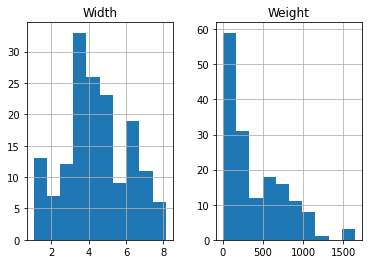

In [12]:
viz = df[['Width','Weight']]
viz.hist()
plt.show()

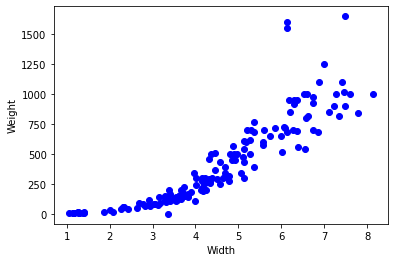

In [14]:
plt.scatter(cdf.Width, cdf.Weight,  color='blue')
plt.xlabel("Width")
plt.ylabel("Weight")
plt.show()

### Test and Train split

In [18]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modeling

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Width']])
train_y = np.asanyarray(train[['Weight']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[193.42511328]]
Intercept:  [-449.61442863]


In [22]:
print(regr.coef_.shape)
print(regr.intercept_.shape)
print(regr.coef_[0])
print(regr.intercept_[0])

(1, 1)
(1,)
[193.42511328]
-449.61442863004936


### Plot outputs

Text(0, 0.5, 'Weight')

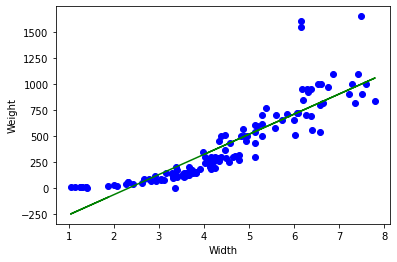

In [25]:
plt.scatter(train.Width, train.Weight,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("Width")
plt.ylabel("Weight")

In [28]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Width']])
test_y = np.asanyarray(test[['Weight']])
test_y_pred = regr.predict(test_x)


print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_pred) )

Mean absolute error: 122.44
Residual sum of squares (MSE): 20688.04
R2-score: 0.82
